# Classification 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("H:/daily learn/Machine Learing\Module 7/Helper text/9.  Implementing k-Nearest Neighbours algorithm/data_cleaned.csv")

In [4]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [6]:
features=df.drop(["Survived"],axis=1)
target=df["Survived"]

In [7]:
from sklearn.preprocessing import MinMaxScaler as mms
sc=mms()

v=sc.fit_transform(features)

features=pd.DataFrame(v,columns=features.columns)

In [8]:
from sklearn.model_selection import train_test_split 

current_train,future_train,current_test,future_test=train_test_split(features,target,random_state=56,stratify=target)

In [9]:
current_train.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
40,0.497361,0.018494,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,0.484795,0.061045,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
547,0.367921,0.027058,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
312,0.321438,0.050749,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75,0.308872,0.014932,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
current_test.head()

40     0
13     0
547    1
312    0
75     0
Name: Survived, dtype: int64

In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [12]:
md=KNN(n_neighbors=1)
md.fit(current_train,current_test)

KNeighborsClassifier(n_neighbors=1)

In [13]:
from sklearn.metrics import f1_score

trs=md.predict(current_train)

f1_score(trs,current_test)*100

97.84735812133071

In [14]:
f1_score(md.predict(future_train),future_test)*100

68.20809248554913

In [15]:
def klan(n):
    ls=[]
    for i in n:
        md=KNN(n_neighbors=i)
        md.fit(current_train,current_test)
        y_predict=md.predict(future_train)
        d=f1_score(y_predict,future_test)
        ls.append(d)
    return ls

In [16]:
k=range(2,20,2)
test=klan(k)

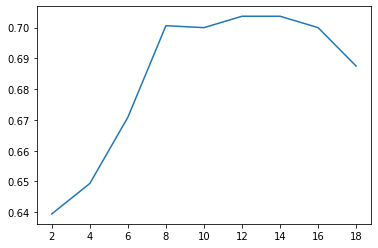

In [17]:
plt.plot(k,test)

# Regression

In [18]:
x=pd.read_csv("H:/daily learn/Machine Learing\Module 7/Helper text/9.  Implementing k-Nearest Neighbours algorithm/train_cleaned.csv")

In [19]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [20]:
x.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
O

In [21]:
x.shape

(8523, 46)

In [22]:
f=x.drop(["Item_Outlet_Sales"],axis=1)
t=x["Item_Outlet_Sales"]

In [23]:
t.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [24]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
g=ss.fit_transform(f)
f=pd.DataFrame(g,columns=f.columns)

In [25]:
f.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split as tts
ctr,ftr,cte,fte=tts(f,t,random_state=56)

In [27]:
ctr.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
178,0.000000,0.581665,0.045931,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3644,0.843091,0.047144,0.543596,0.708333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3197,0.000000,0.130787,0.714284,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1791,0.000000,0.246701,0.286710,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2184,0.312646,0.127657,0.259154,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
ftr.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2172,0.576112,0.541946,0.602082,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6228,0.341218,0.000000,0.525635,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2404,0.782201,0.365838,0.636709,0.916667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
99,0.409836,0.227251,0.664544,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4945,0.430679,0.048285,0.213793,0.791667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
from sklearn.neighbors import KNeighborsRegressor as RK
rr=RK(n_neighbors=4)

In [34]:
rr.fit(ctr,cte)

KNeighborsRegressor(n_neighbors=4)

In [35]:
from sklearn.metrics import mean_squared_error as mse

In [36]:
tr=rr.predict(ctr)
mse(tr,cte)

911052.8617397626

In [37]:
yp=rr.predict(ftr)

In [38]:
mse(fte,yp)

1755117.0989501376

In [39]:
def rv(n):
    ls=[]
    for i in n:
        rr=RK(n_neighbors=i)
        rr.fit(ctr,cte)
        yp=rr.predict(ftr)
        ls.append(mse(fte,yp))
    return ls
    

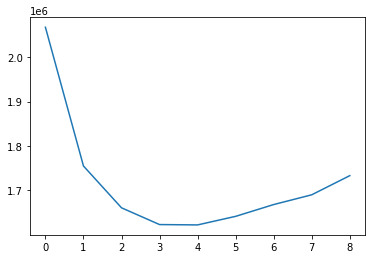

In [40]:
b=range(2,20,2)
op=rv(b)
plt.plot(op)

# KNN UnderFit, OverFit, BestFit 

In [41]:
data=pd.read_csv("H:/daily learn/Machine Learing/Module 8/helper txt/2.  Visualizing overfitting and underfitting using knn/data_cleaned.csv")

In [42]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [43]:
data.shape

(891, 25)

In [44]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [45]:
ft=data.drop(["Survived"],axis=1)
tt=data["Survived"]

In [46]:
from sklearn.preprocessing import MinMaxScaler
sd=MinMaxScaler()

In [47]:
tmp=sd.fit_transform(ft)
ft=pd.DataFrame(tmp,columns=ft.columns)

In [48]:
ft.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
from sklearn.model_selection import train_test_split as tts
Ctrain,Ftrain,Ctest,Ftest=tts(ft,tt,random_state=42,stratify=tt)

In [50]:
from sklearn.neighbors import KNeighborsClassifier as KNN
kn=KNN(n_neighbors=50)

In [51]:
kn.fit(Ctrain,Ctest)

KNeighborsClassifier(n_neighbors=50)

In [52]:
from sklearn.metrics import f1_score

uy=kn.predict(Ctrain)

f1_score(uy,Ctest)

0.699074074074074

In [53]:
tm=kn.predict(Ftrain)

f1_score(tm,Ftest)

0.652482269503546

In [57]:
def fscore(n):
    CT=[]
    FT=[]
    for i in n:
        kn=KNN(n_neighbors=i)
        kn.fit(Ctrain,Ctest)
        uy=kn.predict(Ctrain)
        CT.append(f1_score(uy,Ctest))
        tm=kn.predict(Ftrain)
        FT.append(f1_score(tm,Ftest))
    return CT,FT

In [58]:
hj=range(1,150)
train_f1,test_f1=fscore(hj)

In [59]:
ck=pd.DataFrame({"Train_F1":train_f1,"Test_F1":test_f1},index=hj)
ck

,Train_F1,Test_F1
1,0.960630,0.646707
2,0.795294,0.602941
3,0.828283,0.698795
4,0.783370,0.689189
5,0.803279,0.674699
...,...,...
145,0.587302,0.544000
146,0.585106,0.544000
147,0.588859,0.544000
148,0.581333,0.544000


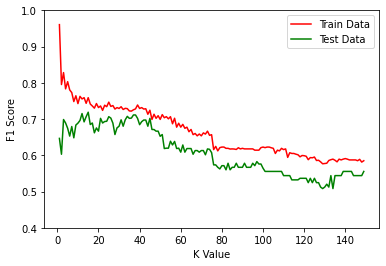

In [60]:
plt.plot(hj,train_f1,color="red",label="Train Data")
plt.plot(hj,test_f1,color="green",label="Test Data")
plt.xlabel("K Value")
plt.ylabel("F1 Score")
plt.ylim(0.4,1)
plt.legend()
plt.show()